<a href="https://colab.research.google.com/github/IrynaBarnych/AI_22/blob/hw/module7/%D0%94%D0%97_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризацію клієнтів. [Опис даних](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних


In [109]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/segmentation%20data.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [110]:
df=df.dropna()

In [111]:
df= df.drop(columns=['Income'])

In [112]:
df= df.drop(columns=['ID'])

In [113]:
df.head()

,Sex,Marital status,Age,Education,Occupation,Settlement size
0,0,0,67,2,1,2
1,1,1,22,1,1,2
2,0,0,49,1,0,0
3,0,0,45,1,1,1
4,0,0,53,1,1,1


In [114]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

data = scaler.fit_transform(df)

In [115]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [116]:
kmeans.inertia_

776.4473894706474

In [117]:
import matplotlib.pyplot as plt

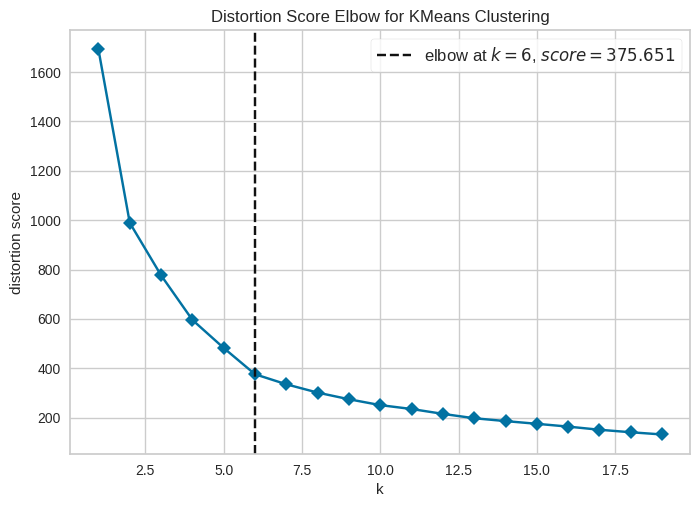

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init=20, random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 20),
                              timings=False,
                              metric='distortion', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()


лікоть приблизно 3.0

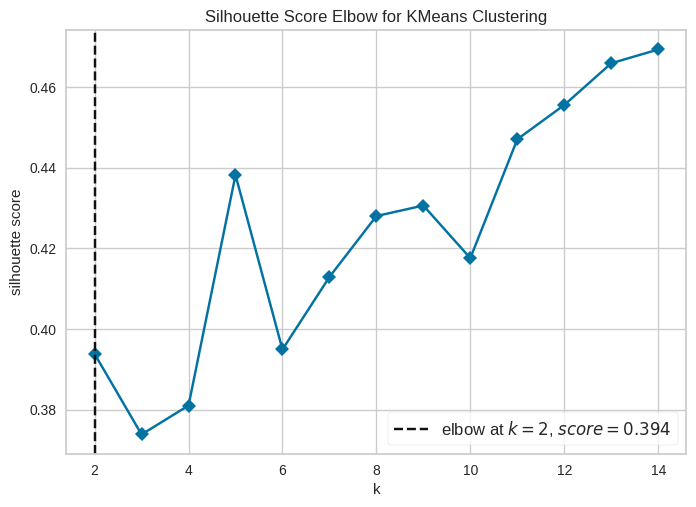

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [119]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(2, 15),
                              timings=False,
                              metric='silhouette', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

лікоть приблизно 2.0

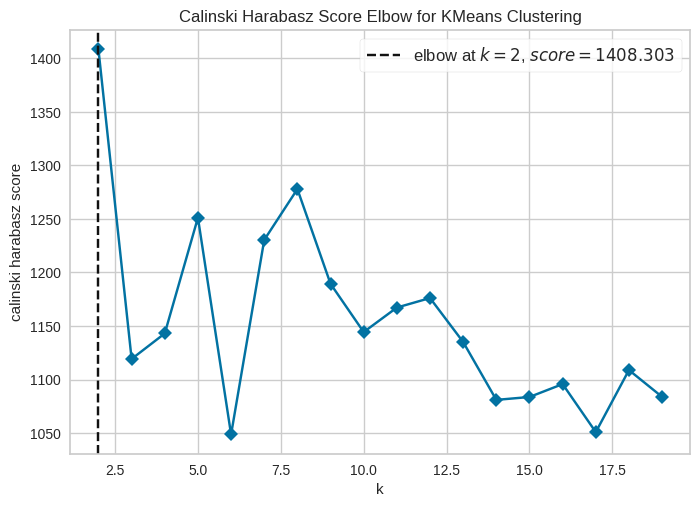

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [120]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(2, 20),
                              timings=False,
                              metric='calinski_harabasz', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

лікоть приблизно 2.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


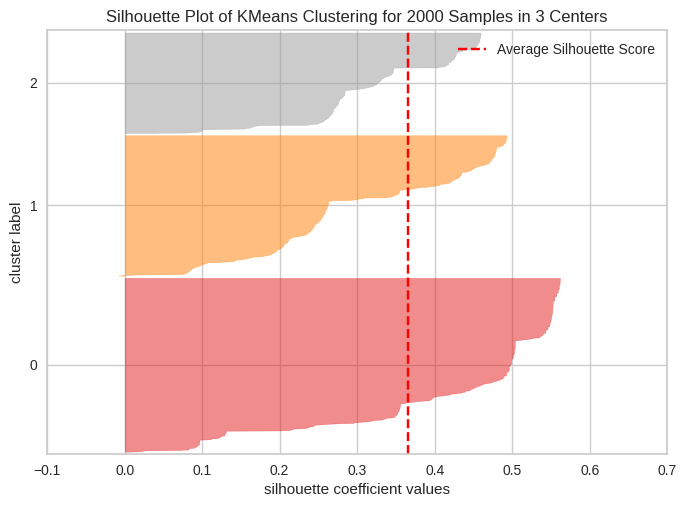

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [121]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(3))
visualizer.fit(data)
visualizer.show()

На діаграмі кожна точка даних відображається на осі х, а її коефіцієнт силуету - на осі у.
Точки з коефіцієнтом силуету ближче до 1 добре узгоджуються з відповідним кластером.
Значення, близькі до 0, вказують на те, що точка знаходиться на межі кластерів і потенційно може належати до будь-якого з них.
Від'ємні значення вказують на те, що точка може бути неправильно віднесена до поточного кластеру.

In [122]:
kmeans = KMeans(2)

kmeans.fit(data)

df['cluster_id'] = kmeans.labels_

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Sex,Marital status,Age,Education,Occupation,Settlement size,cluster_id
0,0,0,67,2,1,2,0
1,1,1,22,1,1,2,1
2,0,0,49,1,0,0,0
3,0,0,45,1,1,1,0
4,0,0,53,1,1,1,0


In [123]:
df['cluster_id'].value_counts()

cluster_id
1    1008
0     992
Name: count, dtype: int64

In [124]:
results = df.groupby(by='cluster_id').mean()

results

,Sex,Marital status,Age,Education,Occupation,Settlement size
cluster_id,,,,,,
0,0.000000,0.164315,38.427419,0.880040,0.972782,1.054435
1,0.906746,0.823413,33.430556,1.193452,0.650794,0.428571


<Axes: xlabel='cluster_id'>

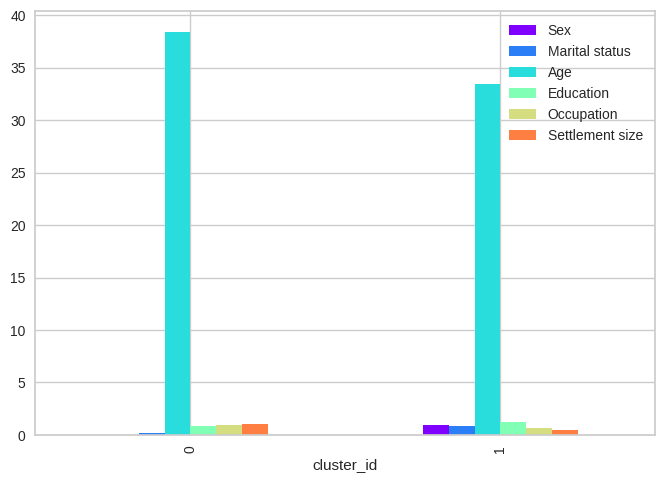

In [125]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)

Кластер 0:
Цей кластер має значення 0 у багатьох ознаках, включаючи стать (Sex), освіту (Education) та Settlement size.
Відповідно до цього, цей кластер може представляти чоловіків, які мають нижчий рівень освіти та можуть жити у великих містах.
Середній вік у цьому кластері старший за середній вік в іншому кластері.
Кластер 1:
Цей кластер має значення близько до 1 у багатьох ознаках, включаючи стать (Sex), сімейний статус (Marital status), освіту (Education) та Settlement size.
Цей кластер може представляти жінок, які мають вищий рівень освіти та можуть жити у менших містах або сільській місцевості.
Середній вік у цьому кластері молодший, ніж у кластері 0.